In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import metrics
import random

import seaborn as sns

In [80]:
data_1 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_1_Training.csv")
test_set_1 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_1_Testing.csv")
train=data_1.set_index('ID_REF').T
test=test_set_1.set_index('ID_REF').T
train_1=train.drop(["CO: 1","CO: 2"], axis=1)
labels_1 = train["CO: 1"]
labels_2 = train["CO: 2"]

In [81]:
train_1_one = train.loc[train['CO: 1']==1]
train_1_zero = train.loc[train['CO: 1']==0]

train_2_one = train.loc[train['CO: 2']==1]
train_2_zero = train.loc[train['CO: 2']==0
                        ]
data_examples_one = train_one[train_one.columns[0:20]]
data_examples_zero = train_zero[train_zero.columns[0:20]]

#print([data_examples.columns])
d1=data_examples.columns
d1=list(d1)
d1.remove('gene_1')


In [82]:
print(len(train_1_one))
print(len(train_1_zero))
print(len(train_2_one))
print(len(train_2_zero))

33
97
53
77


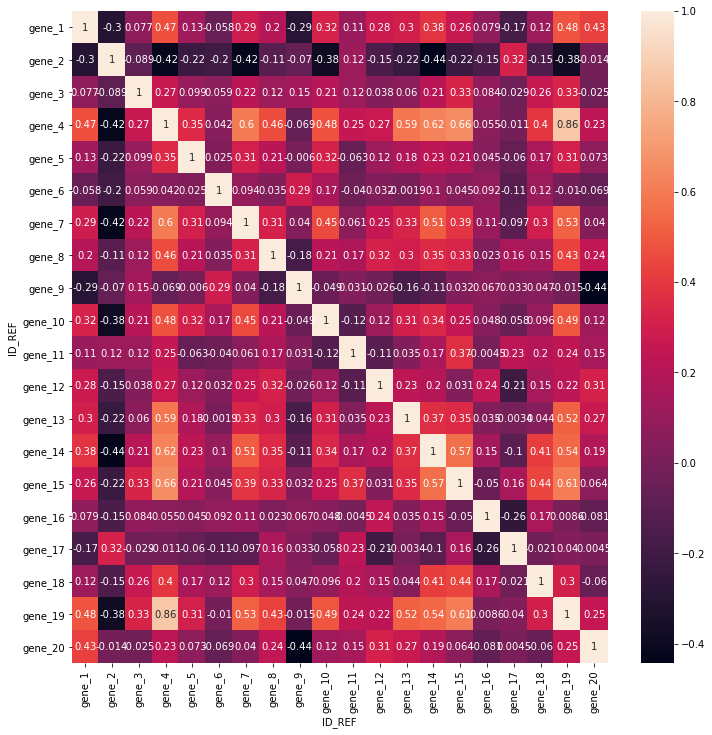

In [83]:
corr_plot_1= plt.subplots(figsize=(12,12))
corr_plot_1 = sns.heatmap(data_examples.corr(),annot=True)

True


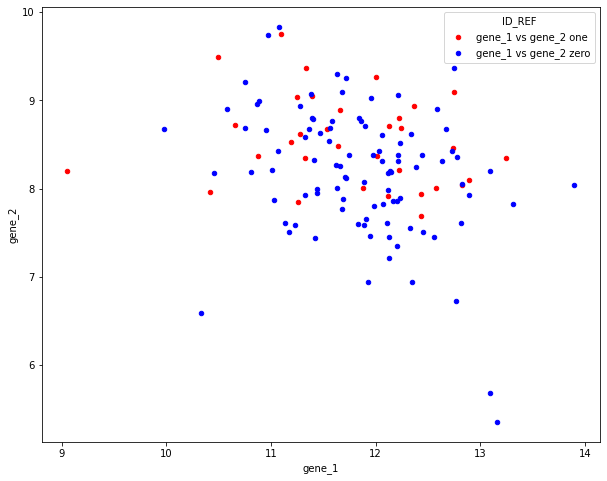

In [84]:

p1 = train_1_one.plot(x = 'gene_1', y = 'gene_2',kind ='scatter', color='r',label='gene_1 vs gene_2 one',figsize=(10,8))
#p2 = data_examples_one.plot(x = 'gene_1', y = 'gene_3',kind ='scatter',color='g',label='gene_1 vs gene_3 one',ax=p1)
#p3 = data_examples_one.plot(x = 'gene_1', y = 'gene_4',kind ='scatter',color='b',label='gene_1 vs gene_4 one',ax=p1)
p4 = train_1_zero.plot(x = 'gene_1', y = 'gene_2',kind ='scatter', color='b',label='gene_1 vs gene_2 zero',ax=p1)
#p5 = data_examples_zero.plot(x = 'gene_1', y = 'gene_3',kind ='scatter',color='m',label='gene_1 vs gene_3 zero',ax=p1)
#p6 = data_examples_zero.plot(x = 'gene_1', y = 'gene_4',kind ='scatter',color='k',label='gene_1 vs gene_4 zero',ax=p1)
print(p1==p4)

True
True
True
True


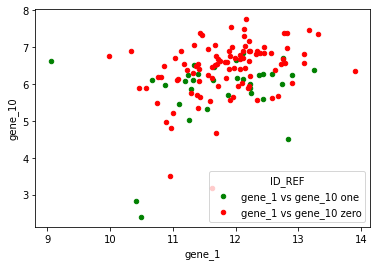

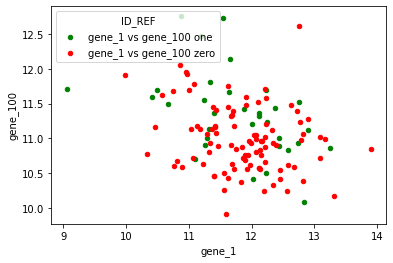

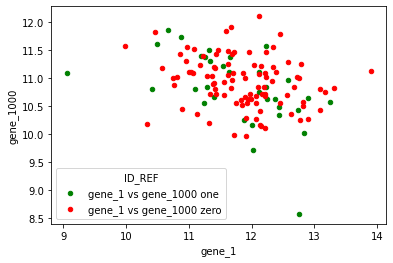

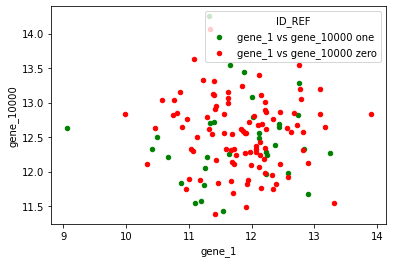

In [85]:
p1 = train_1_one.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='g',label='gene_1 vs gene_10 one',figsize=(6,4))
p2 = train_1_zero.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='r',label='gene_1 vs gene_10 zero',ax=p1)
print(p1==p2)

p3 = train_1_one.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='g',label='gene_1 vs gene_100 one',figsize=(6,4))
p4 = train_1_zero.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='r',label='gene_1 vs gene_100 zero',ax=p3)
print(p4==p3)

p5 = train_1_one.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='g',label='gene_1 vs gene_1000 one',figsize=(6,4))
p6 = train_1_zero.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='r',label='gene_1 vs gene_1000 zero',ax=p5)
print(p5==p6)

p7 = train_1_one.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='g',label='gene_1 vs gene_10000 one',figsize=(6,4))
p8 = train_1_zero.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='r',label='gene_1 vs gene_10000 zero',ax=p7)
print(p7==p8)

True
True
True
True


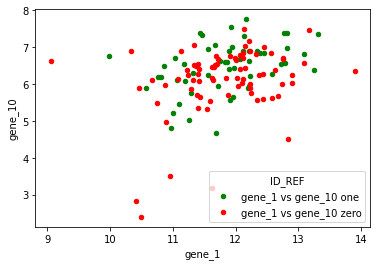

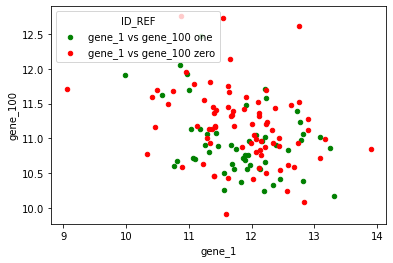

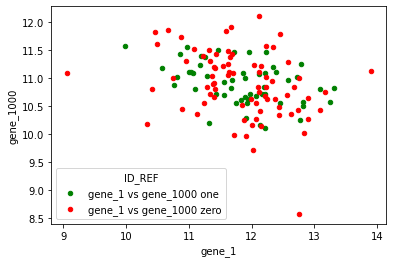

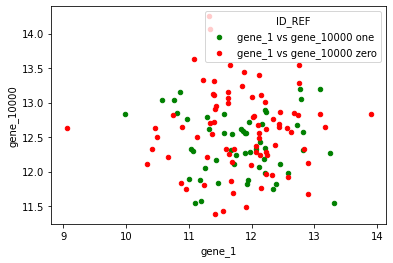

In [86]:
p1 = train_2_one.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='g',label='gene_1 vs gene_10 one',figsize=(6,4))
p2 = train_2_zero.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='r',label='gene_1 vs gene_10 zero',ax=p1)
print(p1==p2)

p3 = train_2_one.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='g',label='gene_1 vs gene_100 one',figsize=(6,4))
p4 = train_2_zero.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='r',label='gene_1 vs gene_100 zero',ax=p3)
print(p4==p3)

p5 = train_2_one.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='g',label='gene_1 vs gene_1000 one',figsize=(6,4))
p6 = train_2_zero.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='r',label='gene_1 vs gene_1000 zero',ax=p5)
print(p5==p6)

p7 = train_2_one.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='g',label='gene_1 vs gene_10000 one',figsize=(6,4))
p8 = train_2_zero.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='r',label='gene_1 vs gene_10000 zero',ax=p7)
print(p7==p8)

In [87]:
data_examples_2 = train_1[['gene_1','gene_367','gene_147','gene_1031','gene_4023','gene_5691','gene_7096','gene_3030','gene_2041','gene_1001','gene_1100','gene_3540','gene_10056','gene_22100','gene_12345',]]
data_examples_2

ID_REF,gene_1,gene_367,gene_147,gene_1031,gene_4023,gene_5691,gene_7096,gene_3030,gene_2041,gene_1001,gene_1100,gene_3540,gene_10056,gene_22100,gene_12345
Train_01,12.4440,11.8747,10.6790,10.3042,8.9193,8.9602,6.2409,8.8563,9.9193,8.7665,9.7229,5.4455,9.4359,9.7840,3.4996
Train_02,12.2005,12.7258,9.9547,10.5197,8.4972,6.8316,3.4316,9.1956,9.8949,10.1211,10.6521,2.2265,9.1907,9.2144,3.3450
Train_03,12.6709,11.9966,9.9713,10.5437,7.8393,6.2327,6.5432,8.2364,9.9977,8.9198,9.2842,4.1698,9.2229,9.4263,3.5464
Train_04,11.6619,11.3954,10.1628,10.4806,8.8208,7.4269,5.0596,9.4509,10.1921,8.9544,9.4396,4.9905,8.8728,11.7614,3.6509
Train_05,11.8397,12.6043,9.8842,10.1764,7.8009,9.5238,2.2948,8.4643,9.8017,8.9226,9.9566,1.7888,9.5540,9.3351,4.0146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_126,11.6268,13.0850,10.4504,11.2496,7.4710,12.9529,3.1401,7.5221,9.0740,8.7840,8.8102,2.5706,9.3555,9.6606,3.9511
Train_127,11.4041,10.8122,10.6146,10.5741,8.7353,5.1697,1.9345,8.0491,9.5368,8.8358,9.1903,2.9649,9.1838,9.6185,4.1594
Train_128,10.7539,12.1073,9.6761,10.8032,8.2588,3.5749,5.6086,6.9357,8.9116,8.9853,9.5540,3.5806,8.4971,9.7151,4.1668
Train_129,11.3627,12.0726,10.1458,10.1668,8.2207,12.4399,2.0078,7.2092,9.0097,9.3002,9.2276,3.6401,6.3843,9.4056,5.0161


In [88]:
data_examples_3 = train_1[train_1.columns[1000:1020]]
data_examples_3

ID_REF,gene_1001,gene_1002,gene_1003,gene_1004,gene_1005,gene_1006,gene_1007,gene_1008,gene_1009,gene_1010,gene_1011,gene_1012,gene_1013,gene_1014,gene_1015,gene_1016,gene_1017,gene_1018,gene_1019,gene_1020
Train_01,8.7665,7.4175,10.2463,9.6502,11.1973,8.3925,10.5272,9.0642,5.8915,10.5568,9.8480,9.2689,9.2593,9.4750,8.0752,10.5821,9.6819,9.9236,10.4918,15.0860
Train_02,10.1211,7.8598,10.2581,9.1302,10.4984,8.9404,10.4413,8.8716,6.3653,10.3903,10.1414,9.7557,9.7459,10.3801,9.7613,10.7665,9.8365,9.5266,11.0004,15.1882
Train_03,8.9198,9.5595,10.7284,9.6662,10.8304,9.4270,10.6348,8.7099,8.5391,9.9034,10.3054,9.6953,9.9201,9.9000,8.3550,11.0842,10.8567,10.4812,11.3038,15.1824
Train_04,8.9544,9.0072,10.2142,8.3247,10.2925,9.2907,11.2028,9.4785,6.7792,9.5231,10.2909,10.1002,9.7294,9.7354,7.7316,10.9387,8.5066,8.6956,10.7703,15.0955
Train_05,8.9226,7.4921,10.4880,9.1427,10.7572,9.2369,10.3060,9.1223,11.8531,8.6033,9.7144,8.5681,9.2611,9.3060,9.6948,10.9211,12.5014,11.6098,11.6178,15.2034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_126,8.7840,7.1842,10.7411,9.4434,10.6041,9.3136,10.1644,8.6553,9.5020,10.1968,9.6198,9.0017,9.8665,9.5211,7.3446,11.1250,10.6511,9.8054,9.8588,16.0454
Train_127,8.8358,6.7722,10.2401,8.9000,10.7421,8.5746,9.7102,8.8664,9.5746,8.2041,9.7936,9.4607,9.1926,9.7117,8.2761,10.9794,9.9287,8.9690,10.6018,16.0078
Train_128,8.9853,5.0294,10.5199,8.8446,9.4970,8.8566,10.2426,9.3723,8.4086,5.9870,10.9483,10.3968,9.8738,9.3857,8.6287,11.2045,10.1799,8.9811,11.0023,16.2585
Train_129,9.3002,5.4082,10.2697,9.3135,10.0234,9.0046,10.8337,9.9197,7.9484,7.1073,9.3591,9.4018,8.3176,8.3044,9.2105,10.5077,10.0677,8.9343,10.2973,16.6492


In [89]:
data_2 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_2_Training.csv")
test_set_2 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_2_Testing.csv")
train=data_2.set_index('ID_REF').T
test=test_set_2.set_index('ID_REF').T
train_2=train.drop(["CO: 3","CO: 4","CO: 5","CO: 6"], axis=1)
labels_3 = train["CO: 3"]
labels_4 = train["CO: 4"]
labels_5 = train["CO: 5"]
labels_6 = train["CO: 6"]

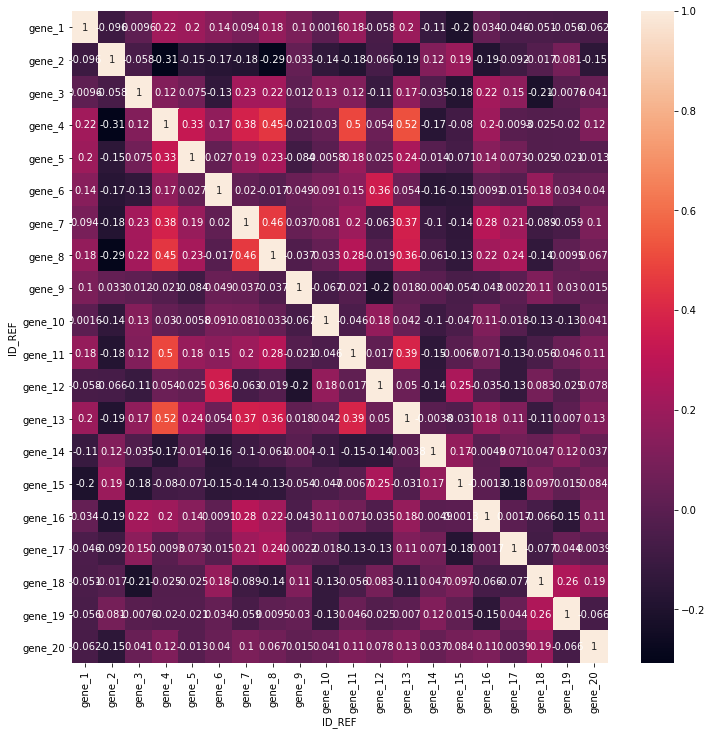

In [90]:
data_examples_1 = train_2[train_2.columns[0:20]]
corr_plot_1= plt.subplots(figsize=(12,12))
corr_plot_1 = sns.heatmap(data_examples_1.corr(),annot=True)

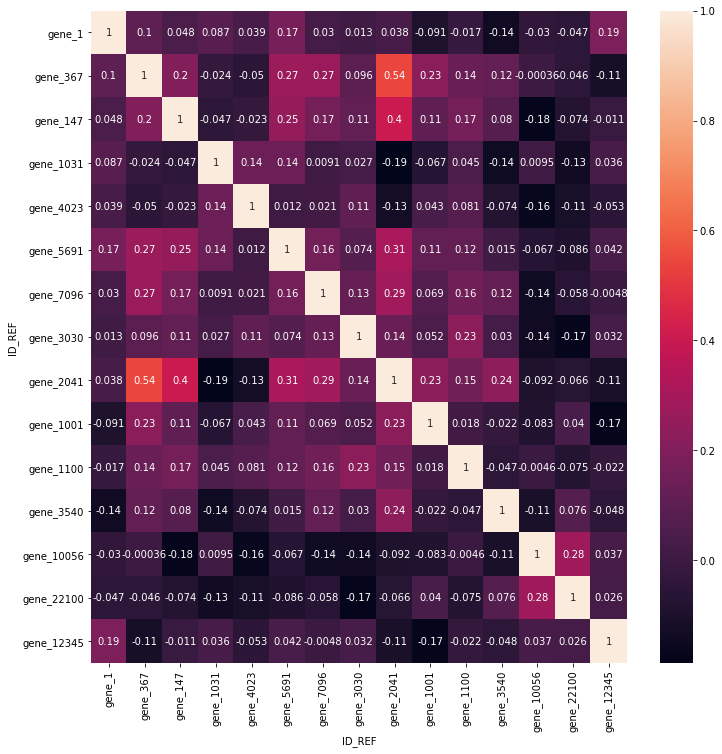

In [91]:
data_examples_2 = train_2[['gene_1','gene_367','gene_147','gene_1031','gene_4023','gene_5691','gene_7096','gene_3030','gene_2041','gene_1001','gene_1100','gene_3540','gene_10056','gene_22100','gene_12345',]]
corr_plot_2= plt.subplots(figsize=(12,12))
corr_plot_2 = sns.heatmap(data_examples_2.corr(),annot=True)

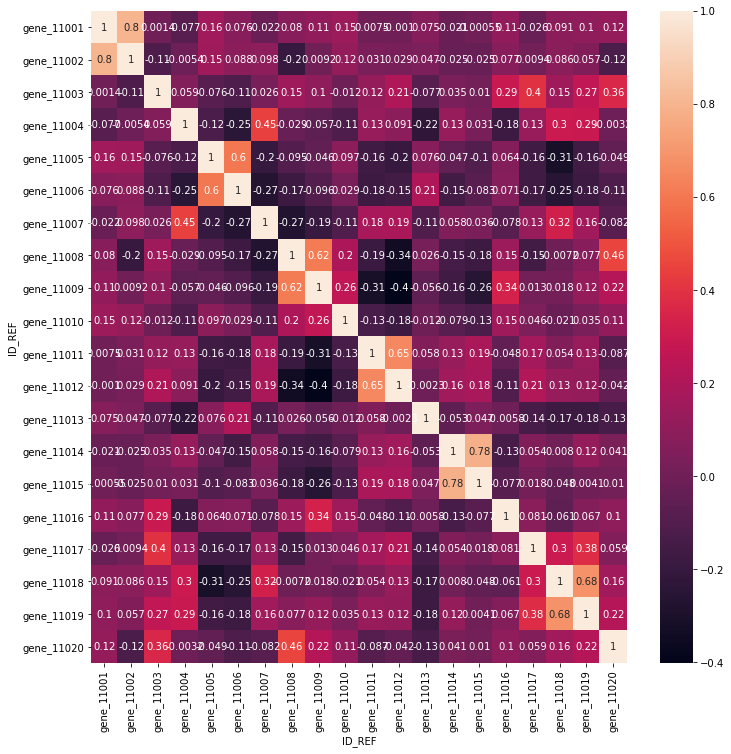

In [92]:
data_examples_3 = train_2[train_2.columns[11000:11020]]
corr_plot_3= plt.subplots(figsize=(12,12))
corr_plot_3 = sns.heatmap(data_examples_3.corr(),annot=True)

In [93]:
train_3_one = train.loc[train['CO: 3']==1]
train_3_zero = train.loc[train['CO: 3']==0]

train_4_one = train.loc[train['CO: 4']==1]
train_4_zero = train.loc[train['CO: 4']==0]
                         
train_5_one = train.loc[train['CO: 5']==1]
train_5_zero = train.loc[train['CO: 5']==0]

train_6_one = train.loc[train['CO: 6']==1]
train_6_zero = train.loc[train['CO: 6']==0]

In [94]:
print(len(train_3_one))
print(len(train_3_zero))
print(len(train_4_one))
print(len(train_4_zero))
print(len(train_5_one))
print(len(train_5_zero))
print(len(train_6_one))
print(len(train_6_zero))

83
257
51
289
146
194
200
140


True
True
True
True


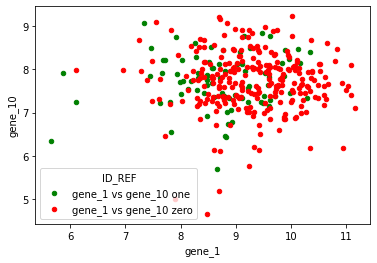

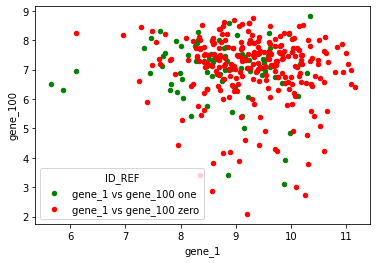

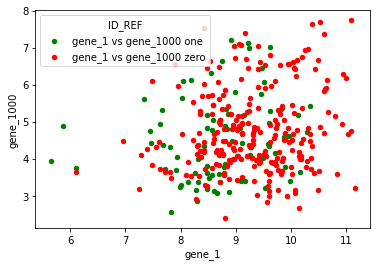

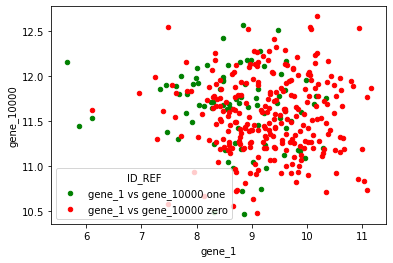

In [95]:
p1 = train_3_one.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='g',label='gene_1 vs gene_10 one',figsize=(6,4))
p2 = train_3_zero.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='r',label='gene_1 vs gene_10 zero',ax=p1)
print(p1==p2)

p3 = train_3_one.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='g',label='gene_1 vs gene_100 one',figsize=(6,4))
p4 = train_3_zero.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='r',label='gene_1 vs gene_100 zero',ax=p3)
print(p4==p3)

p5 = train_3_one.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='g',label='gene_1 vs gene_1000 one',figsize=(6,4))
p6 = train_3_zero.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='r',label='gene_1 vs gene_1000 zero',ax=p5)
print(p5==p6)

p7 = train_3_one.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='g',label='gene_1 vs gene_10000 one',figsize=(6,4))
p8 = train_3_zero.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='r',label='gene_1 vs gene_10000 zero',ax=p7)
print(p7==p8)

True
True
True
True


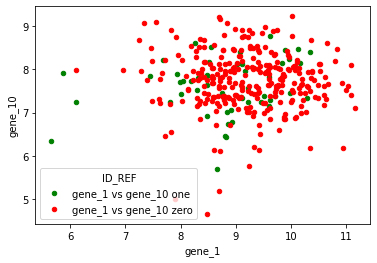

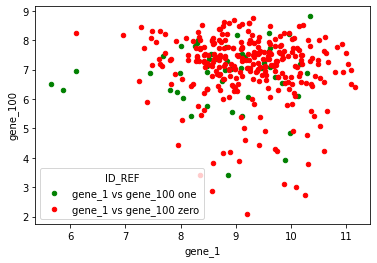

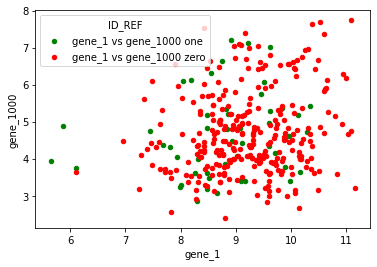

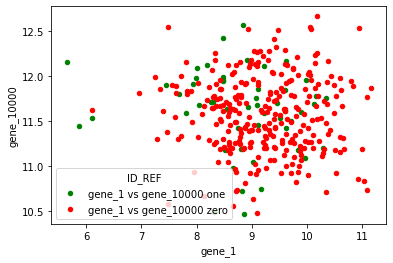

In [96]:
p1 = train_4_one.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='g',label='gene_1 vs gene_10 one',figsize=(6,4))
p2 = train_4_zero.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='r',label='gene_1 vs gene_10 zero',ax=p1)
print(p1==p2)

p3 = train_4_one.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='g',label='gene_1 vs gene_100 one',figsize=(6,4))
p4 = train_4_zero.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='r',label='gene_1 vs gene_100 zero',ax=p3)
print(p4==p3)

p5 = train_4_one.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='g',label='gene_1 vs gene_1000 one',figsize=(6,4))
p6 = train_4_zero.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='r',label='gene_1 vs gene_1000 zero',ax=p5)
print(p5==p6)

p7 = train_4_one.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='g',label='gene_1 vs gene_10000 one',figsize=(6,4))
p8 = train_4_zero.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='r',label='gene_1 vs gene_10000 zero',ax=p7)
print(p7==p8)

True
True
True
True


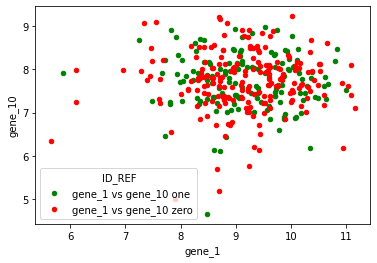

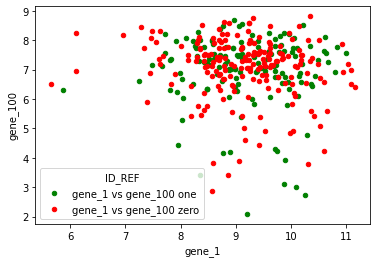

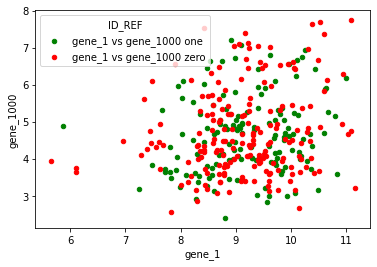

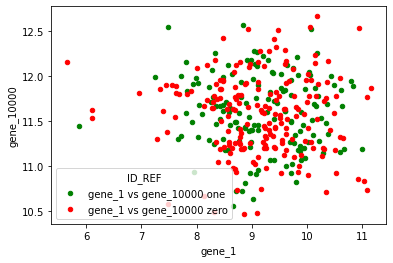

In [97]:
p1 = train_5_one.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='g',label='gene_1 vs gene_10 one',figsize=(6,4))
p2 = train_5_zero.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='r',label='gene_1 vs gene_10 zero',ax=p1)
print(p1==p2)

p3 = train_5_one.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='g',label='gene_1 vs gene_100 one',figsize=(6,4))
p4 = train_5_zero.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='r',label='gene_1 vs gene_100 zero',ax=p3)
print(p4==p3)

p5 = train_5_one.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='g',label='gene_1 vs gene_1000 one',figsize=(6,4))
p6 = train_5_zero.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='r',label='gene_1 vs gene_1000 zero',ax=p5)
print(p5==p6)

p7 = train_5_one.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='g',label='gene_1 vs gene_10000 one',figsize=(6,4))
p8 = train_5_zero.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='r',label='gene_1 vs gene_10000 zero',ax=p7)
print(p7==p8)

True
True
True
True


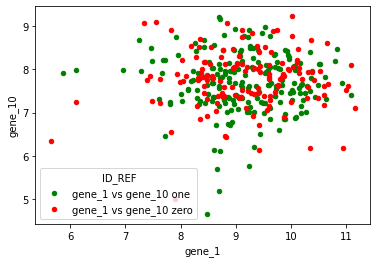

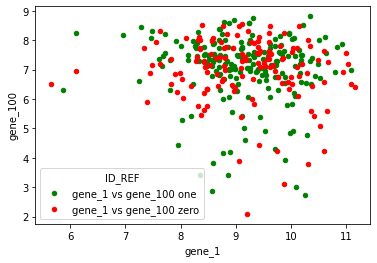

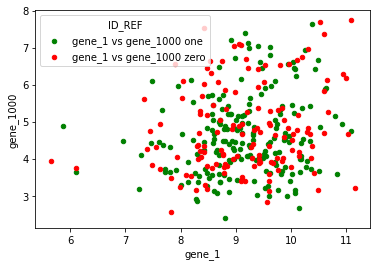

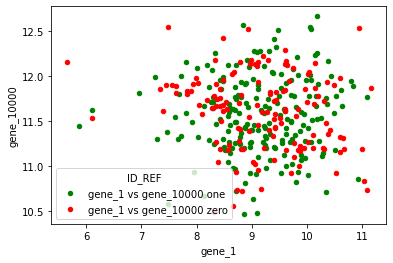

In [98]:
p1 = train_6_one.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='g',label='gene_1 vs gene_10 one',figsize=(6,4))
p2 = train_6_zero.plot(x = 'gene_1', y = 'gene_10',kind ='scatter', color='r',label='gene_1 vs gene_10 zero',ax=p1)
print(p1==p2)

p3 = train_6_one.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='g',label='gene_1 vs gene_100 one',figsize=(6,4))
p4 = train_6_zero.plot(x = 'gene_1', y = 'gene_100',kind ='scatter', color='r',label='gene_1 vs gene_100 zero',ax=p3)
print(p4==p3)

p5 = train_6_one.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='g',label='gene_1 vs gene_1000 one',figsize=(6,4))
p6 = train_6_zero.plot(x = 'gene_1', y = 'gene_1000',kind ='scatter', color='r',label='gene_1 vs gene_1000 zero',ax=p5)
print(p5==p6)

p7 = train_6_one.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='g',label='gene_1 vs gene_10000 one',figsize=(6,4))
p8 = train_6_zero.plot(x = 'gene_1', y = 'gene_10000',kind ='scatter', color='r',label='gene_1 vs gene_10000 zero',ax=p7)
print(p7==p8)